---
# Tutorial Objectives


This tutorial aims to familiarize you with modeling the large-scale network consisting of different versions of the Kuramoto model. Moreover, you will be expose to different differential equation solver packages which deal with ODE and delayed differential equations (DDEs). 


The objectives of this tutorial are to:

- Implement networks consisting of the **Kuramoto** model to represent the brain dynamics.
- Simulate the dynamics of the system with different DEs solvers.
- Plot the order parameters and phase time evolution.
- Incorporate external rhythmic stimulation to the model.

# The Kuramoto Model Description:-
The Kuramoto model (KM) is a measure of synchronization for weakly-connected oscillators. The interaction dynamics, between weakly connected oscillators, can be thought of as a perturbation term in the dynamical model of oscillator x caused by others, this perturbation is called Phase Interaction Function (PIF). The PIF for the Kuramoto model is evaluated to be a sinusoidal function, where it is assumed to equal connection strengths and all-to-all coupling between oscillators. However, there are modifications to the KM where heterogeneous coupling coefficients and various PIFs are invoked.

# Mathematical Model
 The model is represented by,

\begin{equation}\label{E1}
\dot{\theta}_{n}(t)=\omega_{n}+\frac{K}{N} \sum_{m=1}^{N} w_{mn} \sin \left[\theta_{m}(t)-\theta_{n}(t)\right],
\end{equation}
where $\omega_n$ is the natural frequency of the nth oscillator. $K$ is the global coupling strength between all oscillators. $w_{mn}$ is the coupling strength between the mth to nth oscillator. $\theta_n$ and $\theta_m$ are the phase shifts of the oscillator and the neighboring agents. This equation describes the time evolution of the phase of one oscillator subjected to perturbations from neighboring oscillators (breakspear, 2010). 



# Setup
Please make sure to follow the next step to successfully install all the required packages:

In [2]:
# Install and import the required Packages
! pip install networkx tqdm numpy matplotlib scipy jitcdde jitcode multiprocess sympy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv
from scipy.integrate import odeint
import ipywidgets as widgets
import shutil
import os
try:
    from model.KuramotoClassFor import Kuramoto
except ModuleNotFoundError:
    if os.path.isdir('KuramotoNetworksPackage'):
        shutil.rmtree('KuramotoNetworksPackage')
    ! git clone https://github.com/FelipeTorr/KuramotoNetworksPackage.git
    from KuramotoNetworksPackage.model.KuramotoClassFor import Kuramoto
from scipy.io import loadmat

#  Definition of the Network Structure

In [3]:
struct_connectivity=np.array([[0,1,1,1,0,0,0,0,0],
            [1,0,1,0,1,0,0,0,0],
            [1,1,0,0,0,1,0,0,0],
            [1,1,0,0,1,0,0,0,0],
            [0,1,1,0,0,1,0,0,0],
            [0,0,1,1,1,0,0,0,0],
            [0,0,0,0,0,1,0,1,1],
            [0,0,0,0,1,0,1,0,1],
            [0,0,0,0,0,1,1,1,0]])
delays_matrix=np.ones(9)
delays_matrix=delays_matrix-np.diag(delays_matrix)

# Executing the Kuramoto model

In [6]:
dt=1e-3
simulation_period=10
N=9

#Model parameters
K=8
mean_delay=0.004
nat_freq_mean=40
nat_freq_std=0
seed=335

model=Kuramoto(K=K,mean_delay=mean_delay,n_nodes=N,
               struct_connectivity=struct_connectivity,delays_matrix=delays_matrix,
               dt=dt,simulation_period=simulation_period,
               nat_freq_mean=nat_freq_mean,nat_freq_std=nat_freq_std,
              SEED=seed)
R,dynamics=model.simulate()

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/jitcdde/_jitcdde.py:792: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.
  warn("The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.")
100%|██████████| 10000/10000 [00:00<00:00, 204139.14it/s]

Compiled in 0.4795 seconds


# Plots

Text(0.5, 0, 'time (s)')

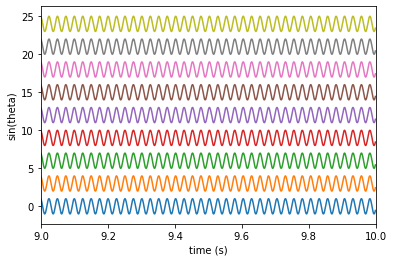

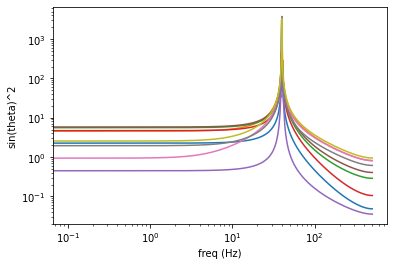

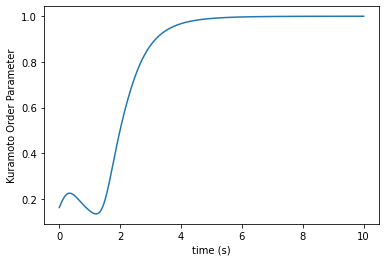

In [7]:
#Timeseries
time=np.arange(0,simulation_period,dt)
freq=np.linspace(0,0.5/dt,int(0.5*simulation_period//dt))
for j in range(N):
    plt.plot(time,np.cos(dynamics[:,j])+3*j)
plt.xlim([9,10])
plt.ylabel('sin(theta)')
plt.xlabel('time (s)')
#Frequency Spectrums
plt.figure()
for j in range(N):
   plt.loglog(freq,np.abs(np.fft.fft(np.sin(dynamics[:,j])))[0:int(0.5*simulation_period//dt)])
plt.ylabel('sin(theta)^2')
plt.xlabel('freq (Hz)')
#Kuramoto order parameter
plt.figure()
plt.plot(time,R)
plt.ylabel('Kuramoto Order Parameter')
plt.xlabel('time (s)')

In [8]:
_ = widgets.interact(model.interact, K=(1, 10, 1))

Widget Javascript not detected.  It may not be installed or enabled properly.
